## Seasonality Decomposition

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

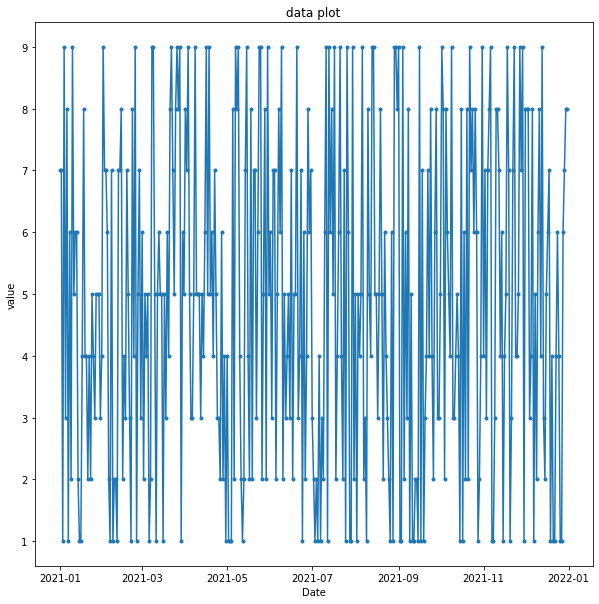

In [9]:
df=pd.DataFrame(np.random.randint(1,10,size=(365,1)),
                columns=['value'],
                index=pd.date_range('2021-01-01',periods=365, freq='D'))
# Plot
plt.plot(df["value"], marker='.')

# Labelling 
plt.xlabel("Date")
plt.ylabel("value")
plt.title("data plot")

# Display
plt.show()


## Multiplicative Decomposition

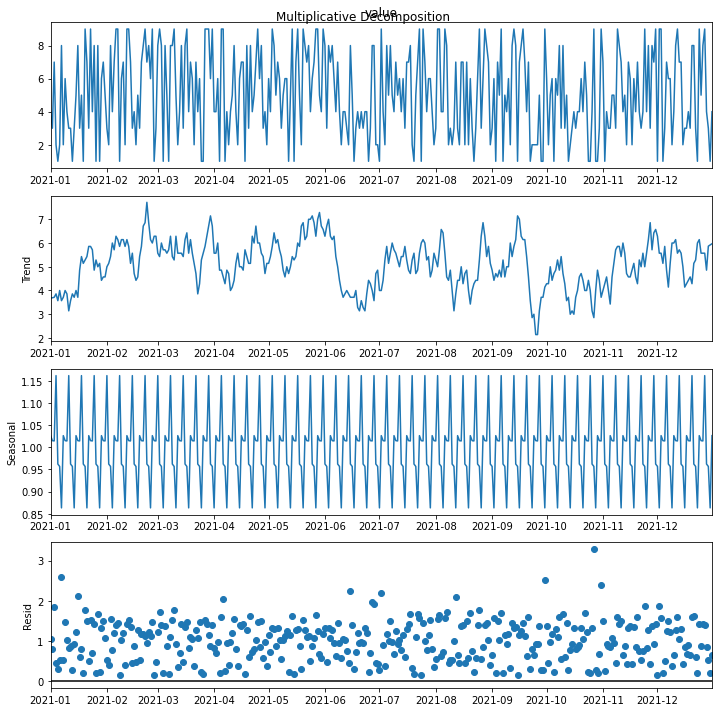

In [8]:
mul=seasonal_decompose(df['value'],model='multiplicative',extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize':(10,10)})
mul.plot().suptitle('Multiplicative Decomposition')
plt.show()

## Additive Decomposition

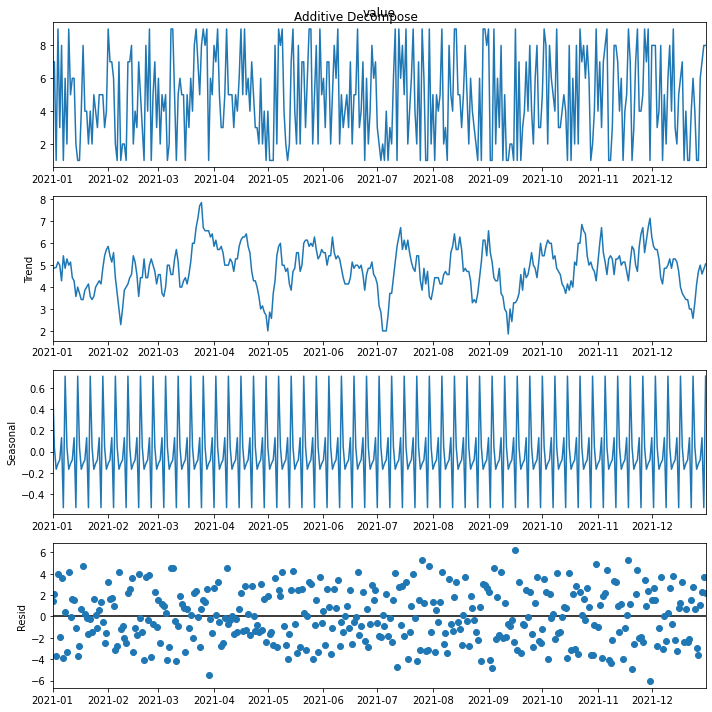

In [12]:
add=seasonal_decompose(df['value'],model='additive',extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize':(10,10)})
add.plot().suptitle('Additive Decompose')
plt.show()

## Simulation

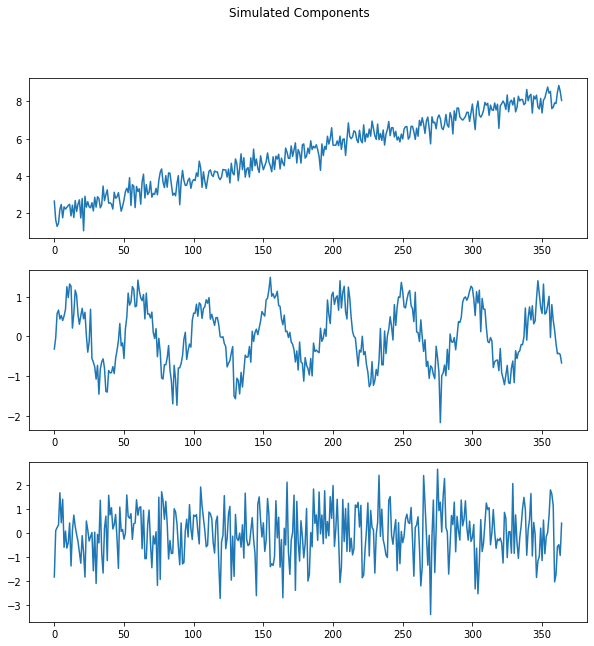

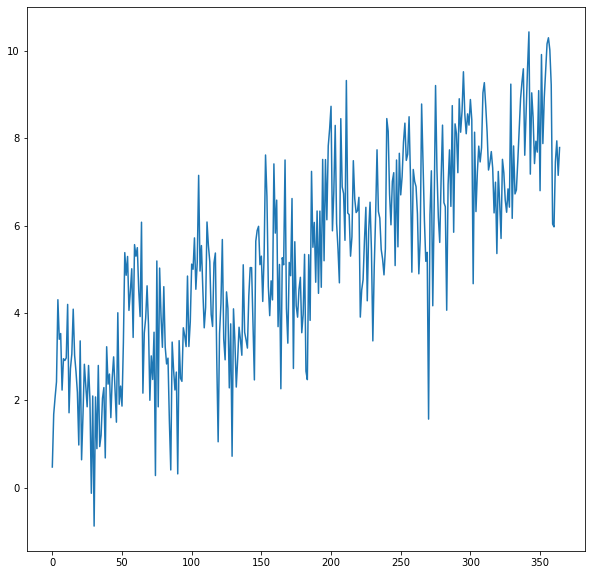

In [40]:
level=2
trend=0.018*np.arange(0,365)+np.random.normal(loc=0, scale=0.4,size=365)
seasonality= np.sin(np.arange(0,365)*np.pi/24)+np.random.normal(loc=0,scale=0.3,size=365)
resid=np.random.normal(loc=0, scale=1.0,size=365)
sim_data=trend+level+seasonality+resid

# components plot
fig, axs = plt.subplots(3)
fig.suptitle('Simulated Components')
axs[0].plot(trend+level)
axs[1].plot(seasonality)
axs[2].plot(resid)
plt.show()

# simulated data plot
plt.plot(trend+level+seasonality+resid)
plt.show()


In [51]:
def check_seasonality(x, probable_periods):
    series_r2, slope, reg_line=do_linear_regression(x)
    best_r2=series_r2
    seasonality=Flase
    best_trend=0
    
    for model_type in ['additive','multiplicative']:
        for period in probable_periods:
            if not (2*period>len(x.index)):
                result=seasonal_decompose(pd.DataFrame(x.values,columns=['value']), 
                model=model_type,
                freq=period)
                trend=result.trend.copy()
                trend.dropna(inplace=True)
                
                trend_r2,trend_slope,reg_trend_line=do_linear_regression(trend)
                
                if trend_r2>best_r2:
                    best_r2=trend_r2
                    seasonality=True
                    best_trend=result.trend
                    
                    return seasonality, best_trend
                

                
output_seasonality,output_trend=check_seasonality(x=sim_data,probable_periods=[4,8,12,16,20,24,36])

NameError: name 'do_linear_regression' is not defined